In [1]:
#!pip3 install comet-ml


In [2]:
#!pip3 install torchgeometry

In [3]:
#!pip3 install einops

In [4]:
#!pip3 install pytorch-msssim

In [5]:
from torch.utils import data
from pathlib import Path
from torch.optim import Adam
from torchvision import transforms, utils

import numpy as np
from tqdm import tqdm
from einops import rearrange

import glob
import os
from PIL import Image
from sklearn.model_selection import train_test_split


In [6]:

data_folder = "./dataset/jpg_images/"
image_size = 32


In [7]:
image_list = os.listdir (data_folder)
print (image_list)

['9dc2cb04-4906-4d06-b6e5-2e32967d7f6b.jpg', '2ddf73f4-376f-41ad-a45d-9c37c4c61b00.jpg', 'a3269262-37a2-4a3f-9a4f-3b968f80699b.jpg', 'c7c2e3a7-171e-46b6-8738-ad9ce09e73ed.jpg', '9d02fd91-4a1a-4008-b1e1-78f5ef068d87.jpg', 'a16ffc75-4665-41ab-812e-b3bdb3b161e8.jpg', 'cd266314-e983-45e2-b806-d46ee361dde9.jpg', 'd963219a-de5a-47b0-b9ed-9da800d2d664.jpg', 'fd8c1324-5326-4269-8ffb-2ca0bf6aeb5b.jpg', 'e46af727-628b-4118-a047-0aa32e808fba.jpg', 'a038bd18-4ff6-4495-8344-ae4c85f44033.jpg', '56a61cd5-35e7-40b4-b6ea-82b1852ef5b8.jpg', '6da54836-bd80-436e-880d-654385b3562f.jpg', '4f09ac56-8aeb-46e0-aa17-32ac9d53b373.jpg', '7bffb30a-19ef-4880-988f-d077633e892f.jpg', 'c31876f6-6827-4282-b53b-fe64a7816f3d.jpg', '47f82608-c808-4fdb-9e0f-44c297646ff8.jpg', '3f1f48ab-1c8d-4277-923b-63c276535df5.jpg', '763aa362-443f-4035-89df-b3954e317bd6.jpg', 'd03b6601-d21e-4621-8c1a-1d5f9ffb7668.jpg', '6324edbf-45f1-4faa-b6ff-c642fce9ffb8.jpg', '14bd0d18-9e72-446d-a78b-7b9390f46c6f.jpg', '4e141575-c3b2-487f-a851-fcebd1

In [8]:
train_list, test_list =  train_test_split(image_list, test_size =.20, shuffle  = True) 

In [9]:
print (len (train_list), len (test_list))

107 27


In [10]:
#val_list, test_list =  train_test_split(test_list, test_size =.50, shuffle  = True) 
val_list=test_list

In [11]:
print (len (train_list), len (test_list), len (val_list))

107 27 27


In [12]:
def cycle(dl):
    while True:
        for data in dl:
            yield data

class DatasetAug(data.Dataset):
    def __init__(self, folder, image_list, transform):
        super().__init__()
        self.folder = folder
        self.image_list = image_list
        self.transform = transform

    def __len__(self):
        return len(self.image_list)

    def __getitem__(self, index):
        img = Image.open(os.path.join (self.folder, self.image_list[index]))
        return self.transform(img)
    

In [13]:
train_transform = transforms.Compose([
            transforms.Resize((int(image_size*1.12), int(image_size*1.12))),
            transforms.RandomCrop(image_size),
            transforms.RandomHorizontalFlip(),
            transforms.ToTensor(),
            transforms.Lambda(lambda t: (t * 2) - 1)
        ])

transform = transforms.Compose([
            transforms.Resize((int(image_size*1.12), int(image_size*1.12))),
            transforms.RandomCrop(image_size),
            transforms.RandomHorizontalFlip(),
            transforms.ToTensor(),
            transforms.Lambda(lambda t: (t * 2) - 1)
        ])

test_transform = transforms.Compose([
            transforms.Resize((int(image_size*1.12), int(image_size*1.12))),
            transforms.ToTensor(),
        ])

In [14]:
ds = DatasetAug(data_folder, train_list, transform)

batch_size = 8
#dl = data.DataLoader(ds, batch_size=batch_size, shuffle=True, num_workers=8)

In [15]:
dl = cycle(data.DataLoader(ds, batch_size=batch_size, shuffle=True, pin_memory=True, num_workers=16,
                                drop_last=True))


In [16]:
import torch

train_data = DatasetAug(data_folder, train_list, transform)
val_data = DatasetAug(data_folder, val_list, transform)
test_data = DatasetAug(data_folder, test_list, transform)

print (train_data, test_data, val_data)

<__main__.DatasetAug object at 0x7fb8e0ecea70> <__main__.DatasetAug object at 0x7fb8e0ece980> <__main__.DatasetAug object at 0x7fb8e0ecfdc0>


In [17]:
train_dl = cycle(torch.utils.data.DataLoader(train_data, shuffle=True, batch_size=8))
val_dl = cycle(torch.utils.data.DataLoader(val_data, shuffle=True, batch_size=8))
test_dl = cycle(torch.utils.data.DataLoader(test_data, shuffle=True, batch_size=8))

In [18]:
img = next(train_dl)
print(f"\n batch data size: {img.size()}")



 batch data size: torch.Size([8, 3, 32, 32])


In [19]:
import matplotlib.pyplot as plt

(8, 3, 32, 32)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


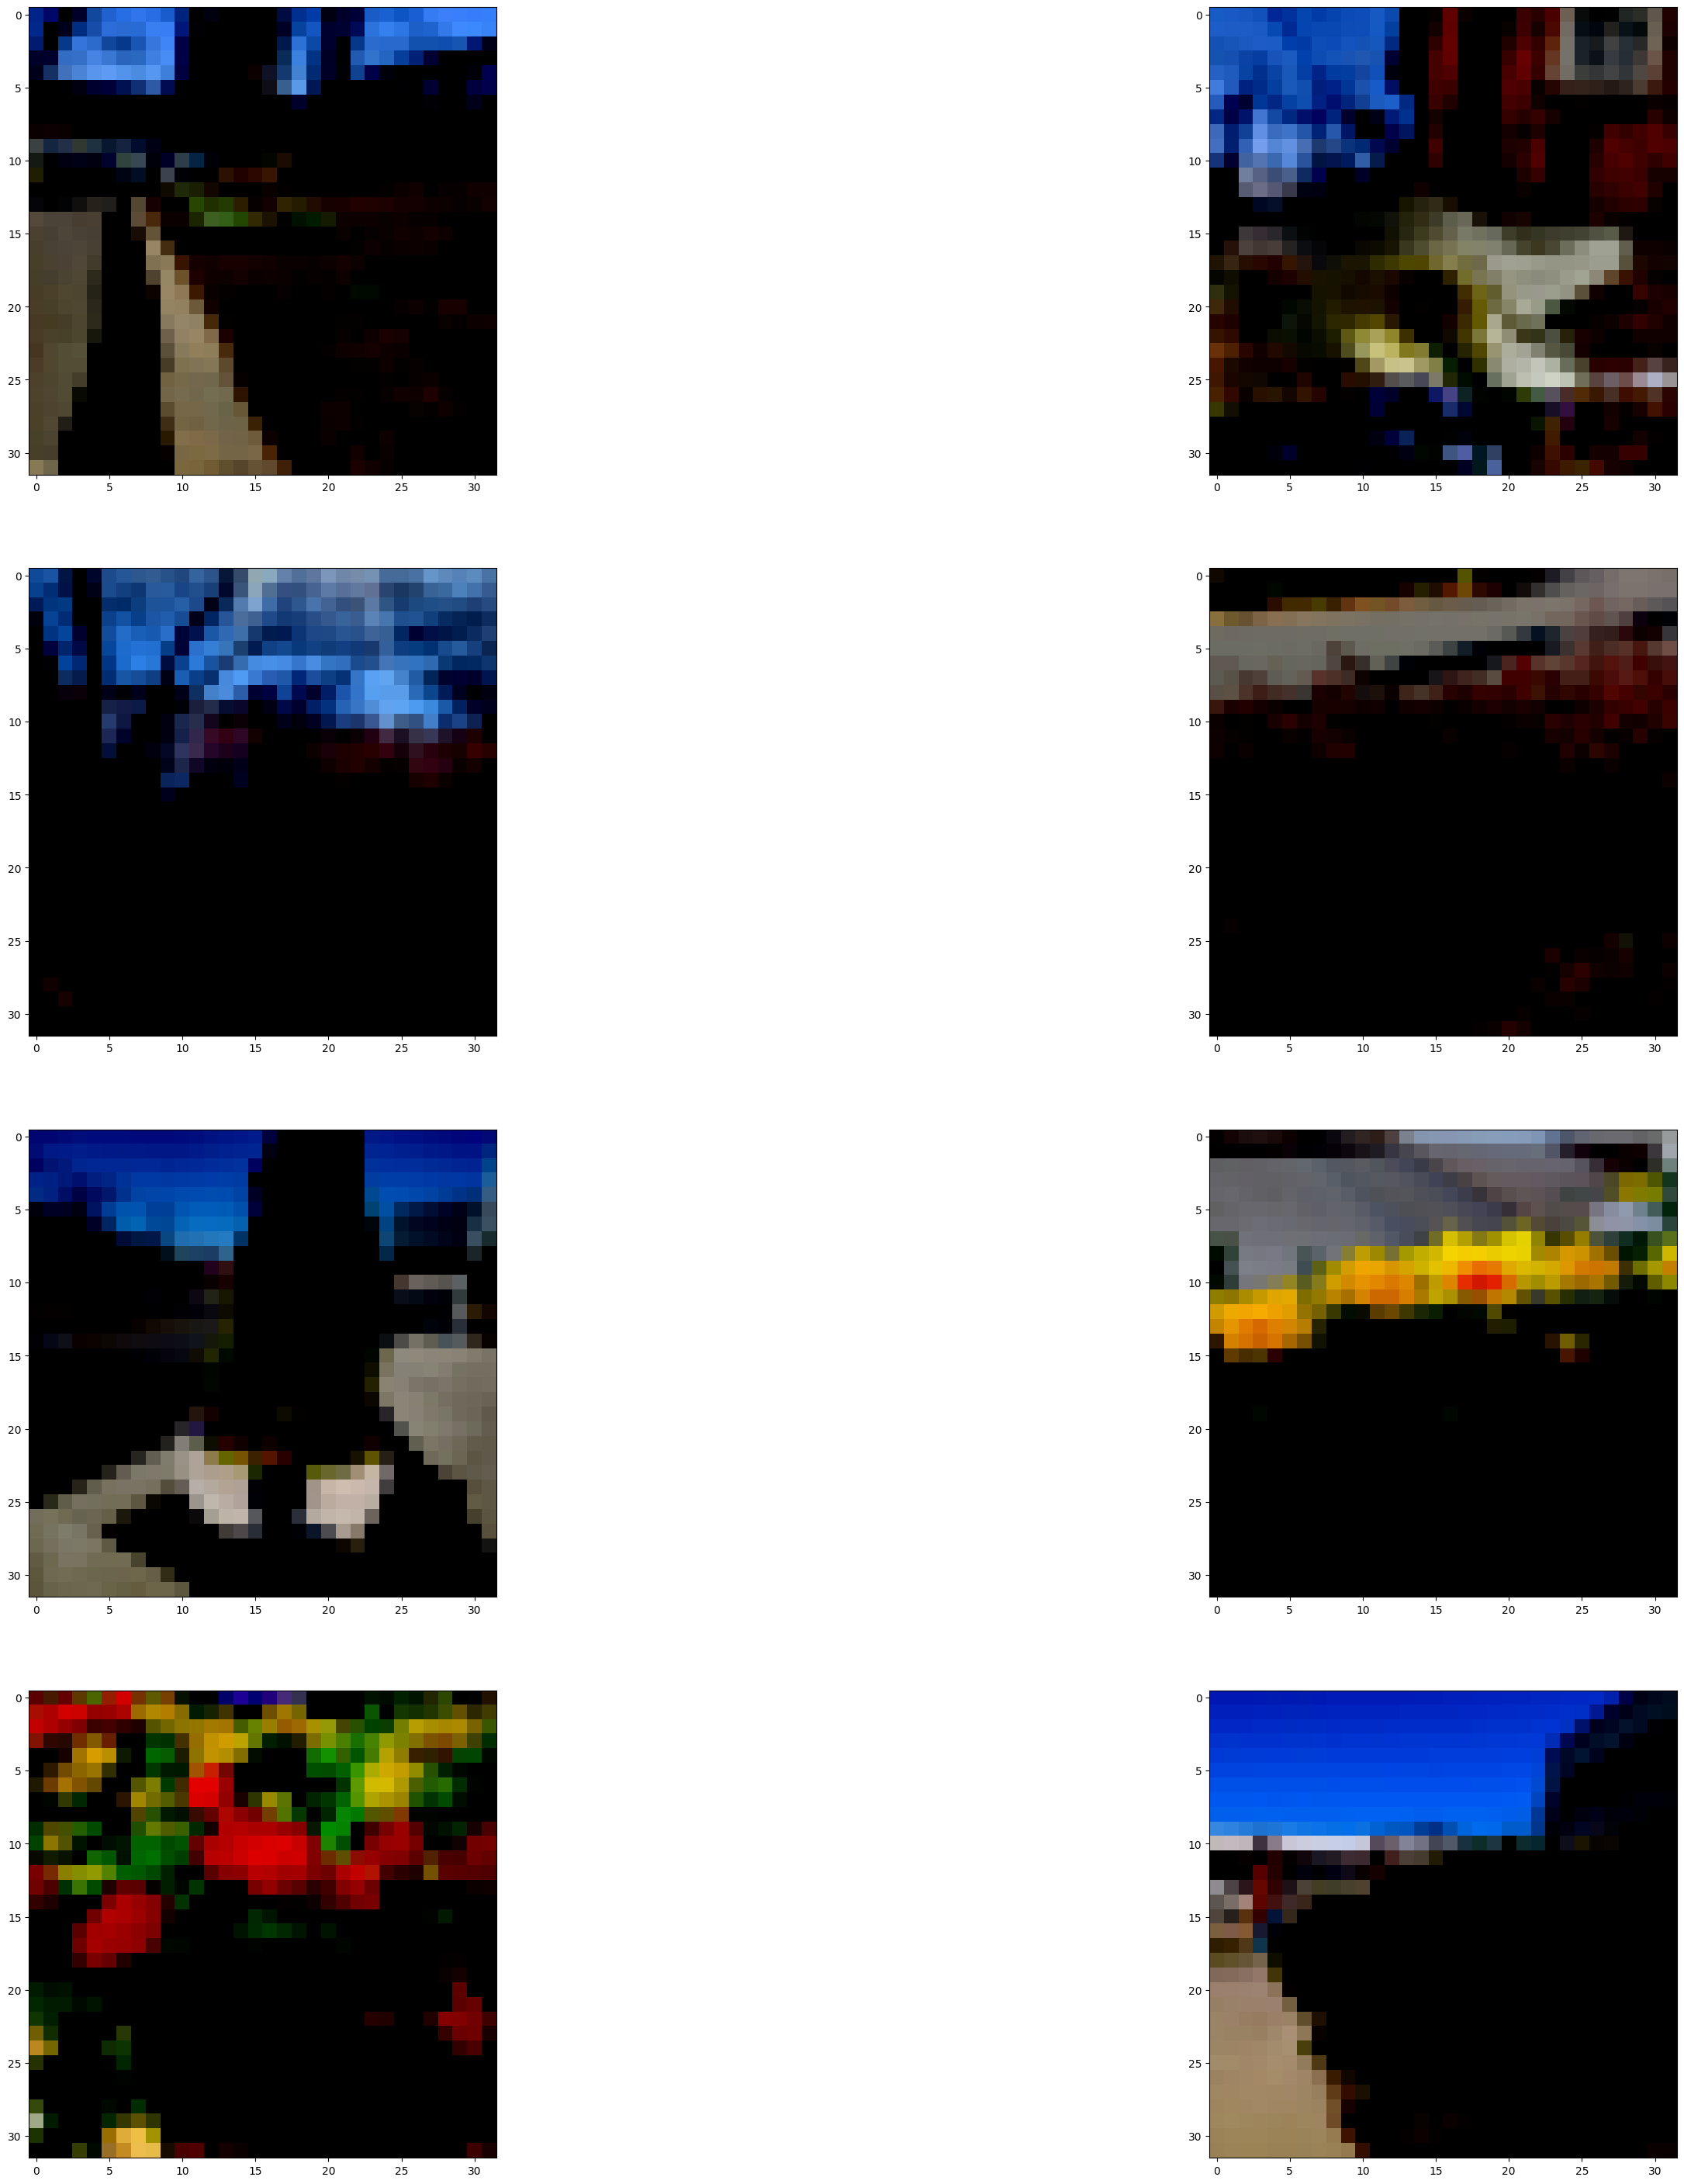

In [20]:
np_img = img.numpy()
print (np_img.shape)
_, axs = plt.subplots(4, 2, figsize=(36, 36))
axs = axs.flatten()
for img, ax in zip(np_img, axs):
    #ax.imshow(img)
    ax.imshow(np.transpose(img, (1, 2, 0)))
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



 test batch data size: torch.Size([8, 3, 32, 32])
(8, 3, 32, 32)


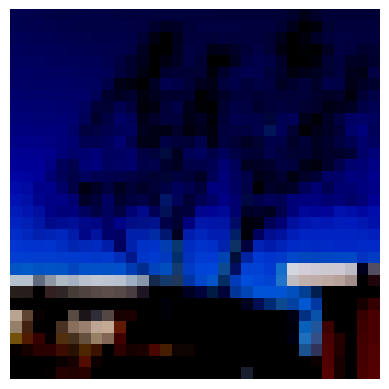

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


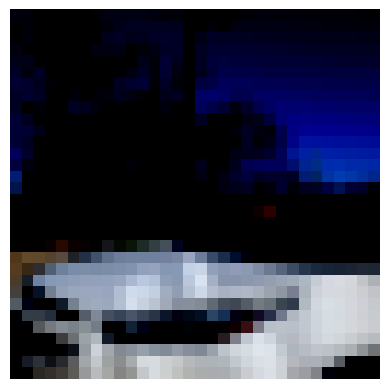

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


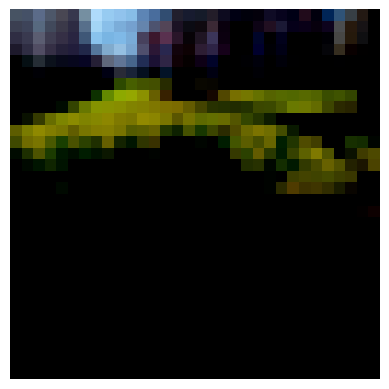

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


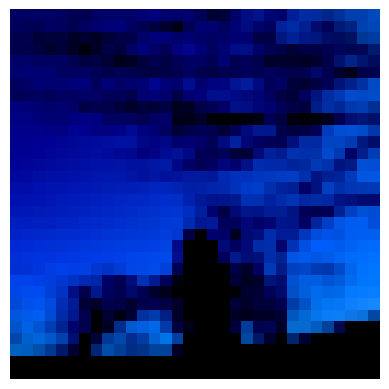

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


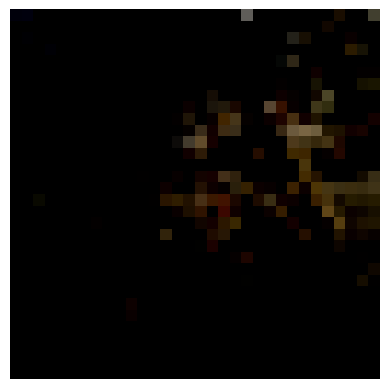

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


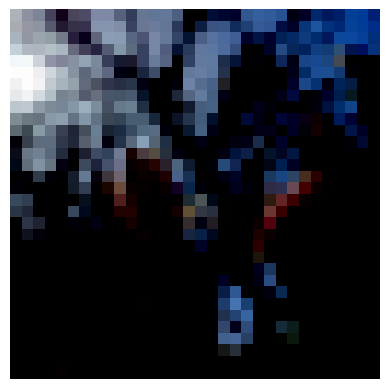

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


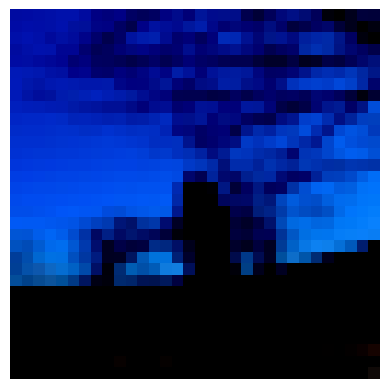

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


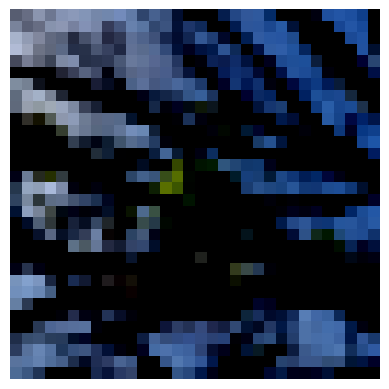

In [21]:

img = next(test_dl)
print(f"\n test batch data size: {img.size()}")
np_img = img.numpy()
print (np_img.shape)
for i in range(8):
    plt.axis("off")
    plt.imshow(np.transpose(np_img[i], (1, 2, 0)))
    plt.show()

In [22]:
img = next(val_dl)
print(f"\n Validation batch data size: {img.size()}")
np_img = img.numpy()



 Validation batch data size: torch.Size([8, 3, 32, 32])


In [23]:
import sys
path = "./"

In [24]:
from comet_ml import Experiment
#from deblurring_diffusion_pytorch import Unet, GaussianDiffusion, Trainer, Model

In [25]:
import math
import torch
import torch.nn as nn


def get_timestep_embedding(timesteps, embedding_dim):

    assert len(timesteps.shape) == 1

    half_dim = embedding_dim // 2
    emb = math.log(10000) / (half_dim - 1)
    emb = torch.exp(torch.arange(half_dim, dtype=torch.float32) * -emb)
    emb = emb.to(device=timesteps.device)
    emb = timesteps.float()[:, None] * emb[None, :]
    emb = torch.cat([torch.sin(emb), torch.cos(emb)], dim=1)
    if embedding_dim % 2 == 1:  # zero pad
        emb = torch.nn.functional.pad(emb, (0,1,0,0))
    return emb


def nonlinearity(x):
    # swish
    return x*torch.sigmoid(x)


def Normalize(in_channels):
    return torch.nn.GroupNorm(num_groups=32, num_channels=in_channels, eps=1e-6, affine=True)


class Upsample(nn.Module):
    def __init__(self, in_channels, with_conv):
        super().__init__()
        self.with_conv = with_conv
        if self.with_conv:
            self.conv = torch.nn.Conv2d(in_channels,
                                        in_channels,
                                        kernel_size=3,
                                        stride=1,
                                        padding=1)

    def forward(self, x):
        x = torch.nn.functional.interpolate(x, scale_factor=2.0, mode="nearest")
        if self.with_conv:
            x = self.conv(x)
        return x


class Downsample(nn.Module):
    def __init__(self, in_channels, with_conv):
        super().__init__()
        self.with_conv = with_conv
        if self.with_conv:
            # no asymmetric padding in torch conv, must do it ourselves
            self.conv = torch.nn.Conv2d(in_channels,
                                        in_channels,
                                        kernel_size=3,
                                        stride=2,
                                        padding=0)

    def forward(self, x):
        if self.with_conv:
            pad = (0,1,0,1)
            x = torch.nn.functional.pad(x, pad, mode="constant", value=0)
            x = self.conv(x)
        else:
            x = torch.nn.functional.avg_pool2d(x, kernel_size=2, stride=2)
        return x


class ResnetBlock(nn.Module):
    def __init__(self, *, in_channels, out_channels=None, conv_shortcut=False,
                 dropout, temb_channels=512):
        super().__init__()
        self.in_channels = in_channels
        out_channels = in_channels if out_channels is None else out_channels
        self.out_channels = out_channels
        self.use_conv_shortcut = conv_shortcut

        self.norm1 = Normalize(in_channels)
        self.conv1 = torch.nn.Conv2d(in_channels,
                                     out_channels,
                                     kernel_size=3,
                                     stride=1,
                                     padding=1)
        self.temb_proj = torch.nn.Linear(temb_channels,
                                         out_channels)
        self.norm2 = Normalize(out_channels)
        self.dropout = torch.nn.Dropout(dropout)
        self.conv2 = torch.nn.Conv2d(out_channels,
                                     out_channels,
                                     kernel_size=3,
                                     stride=1,
                                     padding=1)
        if self.in_channels != self.out_channels:
            if self.use_conv_shortcut:
                self.conv_shortcut = torch.nn.Conv2d(in_channels,
                                                     out_channels,
                                                     kernel_size=3,
                                                     stride=1,
                                                     padding=1)
            else:
                self.nin_shortcut = torch.nn.Conv2d(in_channels,
                                                    out_channels,
                                                    kernel_size=1,
                                                    stride=1,
                                                    padding=0)

    def forward(self, x, temb):
        h = x
        h = self.norm1(h)
        h = nonlinearity(h)
        h = self.conv1(h)

        h = h + self.temb_proj(nonlinearity(temb))[:,:,None,None]

        h = self.norm2(h)
        h = nonlinearity(h)
        h = self.dropout(h)
        h = self.conv2(h)

        if self.in_channels != self.out_channels:
            if self.use_conv_shortcut:
                x = self.conv_shortcut(x)
            else:
                x = self.nin_shortcut(x)

        return x+h


class AttnBlock(nn.Module):
    def __init__(self, in_channels):
        super().__init__()
        self.in_channels = in_channels

        self.norm = Normalize(in_channels)
        self.q = torch.nn.Conv2d(in_channels,
                                 in_channels,
                                 kernel_size=1,
                                 stride=1,
                                 padding=0)
        self.k = torch.nn.Conv2d(in_channels,
                                 in_channels,
                                 kernel_size=1,
                                 stride=1,
                                 padding=0)
        self.v = torch.nn.Conv2d(in_channels,
                                 in_channels,
                                 kernel_size=1,
                                 stride=1,
                                 padding=0)
        self.proj_out = torch.nn.Conv2d(in_channels,
                                        in_channels,
                                        kernel_size=1,
                                        stride=1,
                                        padding=0)


    def forward(self, x):
        h_ = x
        h_ = self.norm(h_)
        q = self.q(h_)
        k = self.k(h_)
        v = self.v(h_)

        # compute attention
        b,c,h,w = q.shape
        q = q.reshape(b,c,h*w)
        q = q.permute(0,2,1)   # b,hw,c
        k = k.reshape(b,c,h*w) # b,c,hw
        w_ = torch.bmm(q,k)     # b,hw,hw    w[b,i,j]=sum_c q[b,i,c]k[b,c,j]
        w_ = w_ * (int(c)**(-0.5))
        w_ = torch.nn.functional.softmax(w_, dim=2)

        # attend to values
        v = v.reshape(b,c,h*w)
        w_ = w_.permute(0,2,1)   # b,hw,hw (first hw of k, second of q)
        h_ = torch.bmm(v,w_)     # b, c,hw (hw of q) h_[b,c,j] = sum_i v[b,c,i] w_[b,i,j]
        h_ = h_.reshape(b,c,h,w)

        h_ = self.proj_out(h_)

        return x+h_


class Model(nn.Module):
    def __init__(self, *, ch, out_ch, ch_mult=(1,2,4,8), num_res_blocks,
                 attn_resolutions, dropout=0.0, resamp_with_conv=True, in_channels,
                 resolution):
        super().__init__()
        self.ch = ch
        self.temb_ch = self.ch*4
        self.num_resolutions = len(ch_mult)
        self.num_res_blocks = num_res_blocks
        self.resolution = resolution
        self.in_channels = in_channels

        # timestep embedding
        self.temb = nn.Module()
        self.temb.dense = nn.ModuleList([
            torch.nn.Linear(self.ch,
                            self.temb_ch),
            torch.nn.Linear(self.temb_ch,
                            self.temb_ch),
        ])

        # downsampling
        self.conv_in = torch.nn.Conv2d(in_channels,
                                       self.ch,
                                       kernel_size=3,
                                       stride=1,
                                       padding=1)

        curr_res = resolution
        in_ch_mult = (1,)+ch_mult
        self.down = nn.ModuleList()
        for i_level in range(self.num_resolutions):
            block = nn.ModuleList()
            attn = nn.ModuleList()
            block_in = ch*in_ch_mult[i_level]
            block_out = ch*ch_mult[i_level]
            for i_block in range(self.num_res_blocks):
                block.append(ResnetBlock(in_channels=block_in,
                                         out_channels=block_out,
                                         temb_channels=self.temb_ch,
                                         dropout=dropout))
                block_in = block_out
                if curr_res in attn_resolutions:
                    attn.append(AttnBlock(block_in))
            down = nn.Module()
            down.block = block
            down.attn = attn
            if i_level != self.num_resolutions-1:
                down.downsample = Downsample(block_in, resamp_with_conv)
                curr_res = curr_res // 2
            self.down.append(down)

        # middle
        self.mid = nn.Module()
        self.mid.block_1 = ResnetBlock(in_channels=block_in,
                                       out_channels=block_in,
                                       temb_channels=self.temb_ch,
                                       dropout=dropout)
        self.mid.attn_1 = AttnBlock(block_in)
        self.mid.block_2 = ResnetBlock(in_channels=block_in,
                                       out_channels=block_in,
                                       temb_channels=self.temb_ch,
                                       dropout=dropout)

        # upsampling
        self.up = nn.ModuleList()
        for i_level in reversed(range(self.num_resolutions)):
            block = nn.ModuleList()
            attn = nn.ModuleList()
            block_out = ch*ch_mult[i_level]
            skip_in = ch*ch_mult[i_level]
            for i_block in range(self.num_res_blocks+1):
                if i_block == self.num_res_blocks:
                    skip_in = ch*in_ch_mult[i_level]
                block.append(ResnetBlock(in_channels=block_in+skip_in,
                                         out_channels=block_out,
                                         temb_channels=self.temb_ch,
                                         dropout=dropout))
                block_in = block_out
                if curr_res in attn_resolutions:
                    attn.append(AttnBlock(block_in))
            up = nn.Module()
            up.block = block
            up.attn = attn
            if i_level != 0:
                up.upsample = Upsample(block_in, resamp_with_conv)
                curr_res = curr_res * 2
            self.up.insert(0, up) # prepend to get consistent order

        # end
        self.norm_out = Normalize(block_in)
        self.conv_out = torch.nn.Conv2d(block_in,
                                        out_ch,
                                        kernel_size=3,
                                        stride=1,
                                        padding=1)


    def forward(self, x, t):
        assert x.shape[2] == x.shape[3] == self.resolution
        
        # timestep embedding
        temb = get_timestep_embedding(t, self.ch)
        temb = self.temb.dense[0](temb)
        temb = nonlinearity(temb)
        temb = self.temb.dense[1](temb)

        # print(t)
        # print(temb)

        # downsampling
        hs = [self.conv_in(x)]
        for i_level in range(self.num_resolutions):
            for i_block in range(self.num_res_blocks):
                h = self.down[i_level].block[i_block](hs[-1], temb)
                if len(self.down[i_level].attn) > 0:
                    h = self.down[i_level].attn[i_block](h)
                hs.append(h)
            if i_level != self.num_resolutions-1:
                hs.append(self.down[i_level].downsample(hs[-1]))

        # middle
        h = hs[-1]
        h = self.mid.block_1(h, temb)
        h = self.mid.attn_1(h)
        h = self.mid.block_2(h, temb)

        # upsampling
        for i_level in reversed(range(self.num_resolutions)):
            for i_block in range(self.num_res_blocks+1):
                h = self.up[i_level].block[i_block](
                    torch.cat([h, hs.pop()], dim=1), temb)
                if len(self.up[i_level].attn) > 0:
                    h = self.up[i_level].attn[i_block](h)
            if i_level != 0:
                h = self.up[i_level].upsample(h)

        # end
        h = self.norm_out(h)
        h = nonlinearity(h)
        h = self.conv_out(h)
        return h

In [26]:
from functools import partial
import torchgeometry as tgm
import torch.nn as nn
class GaussianDiffusion(nn.Module):
    def __init__(
        self,
        denoise_fn,
        *,
        image_size,
        device_of_kernel,
        channels = 3,
        timesteps = 1000,
        loss_type = 'l1',
        kernel_std = 0.1,
        kernel_size = 3,
        blur_routine = 'Incremental',
        train_routine = 'Final',
        sampling_routine='default',
        discrete=False
    ):
        super().__init__()
        self.channels = channels
        self.image_size = image_size
        self.denoise_fn = denoise_fn
        self.device_of_kernel = device_of_kernel

        self.num_timesteps = int(timesteps)
        self.loss_type = loss_type
        self.kernel_std = kernel_std
        self.kernel_size = kernel_size
        self.blur_routine = blur_routine

        to_torch = partial(torch.tensor, dtype=torch.float32)
        self.gaussian_kernels = nn.ModuleList(self.get_kernels())
        self.train_routine = train_routine
        self.sampling_routine = sampling_routine
        self.discrete=discrete



    def blur(self, dims, std):
        return tgm.image.get_gaussian_kernel2d(dims, std)

    def get_conv(self, dims, std, mode='circular'):
        kernel = self.blur(dims, std)
        conv = nn.Conv2d(in_channels=self.channels, out_channels=self.channels, kernel_size=dims, padding=int((dims[0]-1)/2), padding_mode=mode,
                         bias=False, groups=self.channels)
        with torch.no_grad():
            kernel = torch.unsqueeze(kernel, 0)
            kernel = torch.unsqueeze(kernel, 0)
            kernel = kernel.repeat(self.channels, 1, 1, 1)
            conv.weight = nn.Parameter(kernel)

        return conv

    def get_kernels(self):
        kernels = []
        for i in range(self.num_timesteps):
            if self.blur_routine == 'Incremental':
                kernels.append(self.get_conv((self.kernel_size, self.kernel_size), (self.kernel_std*(i+1), self.kernel_std*(i+1)) ) )
            
        return kernels


    @torch.no_grad()
    def sample(self, batch_size = 16, img=None, t=None):
        #print ("In Sample")
        self.denoise_fn.eval()

        if t==None:
            t=self.num_timesteps
        
        for i in range(t):
            with torch.no_grad():
                img = self.gaussian_kernels[i](img)

        orig_mean = torch.mean(img, [2, 3], keepdim=True)
        #print(orig_mean.squeeze()[0])

        temp = img
        if self.discrete:
            img = torch.mean(img, [2, 3], keepdim=True)
            img = img.expand(temp.shape[0], temp.shape[1], temp.shape[2], temp.shape[3])

        # 3(2), 2(1), 1(0)
        xt = img
        direct_recons = None
        while(t):
            step = torch.full((batch_size,), t - 1, dtype=torch.long).cuda() 
            x = self.denoise_fn(img, step)
            #print ("Output of denoising function : ", x.shape)
            if direct_recons == None:
                direct_recons = x
                
            for i in range(t-1):
                with torch.no_grad():
                    x = self.gaussian_kernels[i](x)
            img = x
            t = t - 1
        self.denoise_fn.train()
        return xt, direct_recons, img
    
    def q_sample(self, x_start, t):
        max_iters = torch.max(t)
        all_blurs = []
        x = x_start
        for i in range(max_iters+1):
            with torch.no_grad():
                x = self.gaussian_kernels[i](x)
                if self.discrete:
                    if i == (self.num_timesteps-1):
                        x = torch.mean(x, [2, 3], keepdim=True)
                        x = x.expand(x_start.shape[0], x_start.shape[1], x_start.shape[2], x_start.shape[3])
                all_blurs.append(x)

        all_blurs = torch.stack(all_blurs)

        choose_blur = []
        # step is batch size as well so for the 49th step take the step(batch_size)
        for step in range(t.shape[0]):
            if step != -1:
                choose_blur.append(all_blurs[t[step], step])
            else:
                choose_blur.append(x_start[step])

        choose_blur = torch.stack(choose_blur)
        if self.discrete:
            choose_blur = (choose_blur + 1) * 0.5
            choose_blur = (choose_blur * 255)
            choose_blur = choose_blur.int().float() / 255
            choose_blur = choose_blur * 2 - 1
        #choose_blur = all_blurs
        return choose_blur
    
    
    @torch.no_grad()
    def all_sample(self, batch_size=8, img=None, t=10, times=10, eval=True):

        #print (" t : ", t, times)
        self.denoise_fn.eval()

        for i in range(t):
             with torch.no_grad():
                    img = self.gaussian_kernels[i](img)

        X_0s = []
        X_ts = []
        temp = img
        if self.discrete:
            img = torch.mean(img, [2, 3], keepdim=True)
            img = img.expand(temp.shape[0], temp.shape[1], temp.shape[2], temp.shape[3])
            noise = torch.randn_like(img) * 0.001
            img = img + noise

        # 3(2), 2(1), 1(0)
        while (times):
            #print ("times : ", times)
            step = torch.full((batch_size,), times - 1, dtype=torch.long).cuda()
            x = self.denoise_fn(img, step)
            X_0s.append(x)
            X_ts.append(img)
            
            x_times_sub_1 = x
            for i in range(times-1):
                with torch.no_grad():
                    x_times_sub_1 = self.gaussian_kernels[i](x_times_sub_1)

            img = x_times_sub_1
            times = times - 1

        if self.discrete:
            img = img - noise
        X_0s.append(img)

        #self.denoise_fn.train()
        return X_0s, X_ts
    
    def p_losses(self, x_start, t):
        b, c, h, w = x_start.shape
        if self.train_routine == 'Final':
            x_blur = self.q_sample(x_start=x_start, t=t)
            x_recon = self.denoise_fn(x_blur, t)
            if self.loss_type == 'l1':
                loss = (x_start - x_recon).abs().mean()
            elif self.loss_type == 'l2':
                loss = F.mse_loss(x_start, x_recon)
            else:
                raise NotImplementedError()

        return loss
        
        
    def forward(self, x, *args, **kwargs):
        #print ("Input to diffusion shape : ", x.shape)
        b, c, h, w, device, img_size, = *x.shape, x.device, self.image_size
        assert h == img_size and w == img_size, f'height and width of image must be {img_size}'
        t = torch.randint(0, self.num_timesteps, (b,), device=device).long()
        return self.p_losses(x, t, *args, **kwargs)
        
        

In [27]:
import copy
from torchvision import transforms, utils

def loss_backwards(fp16, loss, optimizer, **kwargs):
    if fp16:
        with amp.scale_loss(loss, optimizer) as scaled_loss:
            scaled_loss.backward(**kwargs)
    else:
        loss.backward(**kwargs)
        
class EMA():
    def __init__(self, beta):
        super().__init__()
        self.beta = beta

    def update_model_average(self, ma_model, current_model):
        for current_params, ma_params in zip(current_model.parameters(), ma_model.parameters()):
            old_weight, up_weight = ma_params.data, current_params.data
            ma_params.data = self.update_average(old_weight, up_weight)

    def update_average(self, old, new):
        if old is None:
            return new
        return old * self.beta + (1 - self.beta) * new

    
class Trainer(object):
    def __init__(
        self,
        diffusion_model,
        ds,
        dl,
        *,
        ema_decay = 0.995,
        image_size = 128,
        train_batch_size = 32,
        train_lr = 2e-5,
        train_num_steps = 100000,
        gradient_accumulate_every = 2,
        fp16 = False,
        step_start_ema = 2000,
        update_ema_every = 10,
        save_and_sample_every = 1000,
        results_folder = './results',
        load_path = None,
        dataset = None,
        shuffle=True
    ):
        super().__init__()
        self.model = diffusion_model
        self.ema = EMA(ema_decay)
        self.ema_model = copy.deepcopy(self.model)
        self.update_ema_every = update_ema_every

        self.step_start_ema = step_start_ema
        self.save_and_sample_every = save_and_sample_every

        self.batch_size = train_batch_size
        self.image_size = image_size
        self.gradient_accumulate_every = gradient_accumulate_every
        self.train_num_steps = train_num_steps
        self.ds = ds
        self.dl = dl
        self.opt = Adam(diffusion_model.parameters(), lr=train_lr)
        self.step = 0

        self.results_folder = Path(results_folder)
        self.results_folder.mkdir(exist_ok = True)

        self.fp16 = fp16

        self.reset_parameters()

        if load_path != None:
            self.load(load_path)


    def reset_parameters(self):
        self.ema_model.load_state_dict(self.model.state_dict())
        
    def step_ema(self):
        if self.step < self.step_start_ema:
            self.reset_parameters()
            return
        self.ema.update_model_average(self.ema_model, self.model)

    def save(self, itrs=None):
        data = {
            'step': self.step,
            'model': self.model.state_dict(),
            'ema': self.ema_model.state_dict()
        }
        if itrs is None:
            torch.save(data, str(self.results_folder / f'model.pt'))
        else:
            torch.save(data, str(self.results_folder / f'model_{itrs}.pt'))

    def add_title(self, path, title):

        import cv2
        import numpy as np

        img1 = cv2.imread(path)

        # --- Here I am creating the border---
        black = [0, 0, 0]  # ---Color of the border---
        constant = cv2.copyMakeBorder(img1, 10, 10, 10, 10, cv2.BORDER_CONSTANT, value=black)
        height = 20
        violet = np.zeros((height, constant.shape[1], 3), np.uint8)
        violet[:] = (255, 0, 180)

        vcat = cv2.vconcat((violet, constant))

        font = cv2.FONT_HERSHEY_SIMPLEX

        cv2.putText(vcat, str(title), (violet.shape[1] // 2, height-2), font, 0.5, (0, 0, 0), 1, 0)
        cv2.imwrite(path, vcat)
        
    def train(self):
        #print ("iN TRAIN")
        backwards = partial(loss_backwards, self.fp16)

        acc_loss = 0
        while self.step < self.train_num_steps:
            u_loss = 0
            for i in range(self.gradient_accumulate_every):
                data = next(self.dl).cuda()
                #print (data.shape)
                modelout = self.model(data)
                #print (modelout, modelout.shape)
                loss = torch.mean(modelout) # change for DP
                #print ("Loss : ", loss, loss.shape, )
                if self.step % 100 == 0:
                    print(f'{self.step}: {loss.item()}')
                u_loss += loss.item()
                backwards(loss / self.gradient_accumulate_every, self.opt)

            acc_loss = acc_loss + (u_loss/self.gradient_accumulate_every)

            self.opt.step()
            self.opt.zero_grad()

            if self.step % self.update_ema_every == 0:
                self.step_ema()

            if self.step != 0 and self.step % self.save_and_sample_every == 0:
                milestone = self.step // self.save_and_sample_every
                batches = self.batch_size
                og_img = next(self.dl).cuda()
                xt, direct_recons, all_images = self.ema_model.sample(batch_size=batches, img=og_img) # change for DP

                og_img = (og_img + 1) * 0.5
                utils.save_image(og_img, str(self.results_folder / f'sample-og-{milestone}.png'), nrow=6)

                all_images = (all_images + 1) * 0.5
                utils.save_image(all_images, str(self.results_folder / f'sample-recon-{milestone}.png'), nrow = 6)

                direct_recons = (direct_recons + 1) * 0.5
                utils.save_image(direct_recons, str(self.results_folder / f'sample-direct_recons-{milestone}.png'), nrow=6)

                xt = (xt + 1) * 0.5
                utils.save_image(xt, str(self.results_folder / f'sample-xt-{milestone}.png'),
                                 nrow=6)

                acc_loss = acc_loss/(self.save_and_sample_every+1)
                print(f'Mean of last {self.step}: {acc_loss}')
                acc_loss=0

                self.save()
                if self.step % (self.save_and_sample_every * 100) == 0:
                    self.save(self.step)

            self.step += 1

        print('training completed')
        
    def fid_distance_decrease_from_manifold(self, ds, fid_func, start=0, end=1000):

        #from skimage.metrics import structural_similarity as ssim
        from pytorch_msssim import ssim

        all_samples = []
        dataset = ds

        print(len(dataset))
        for idx in range(len(dataset)):
            img = dataset[idx]
            img = torch.unsqueeze(img, 0).cuda()
            if idx > start:
                all_samples.append(img[0])
            if idx % 1000 == 0:
                print(idx)
            if end != None:
                if idx == end:
                    print(idx)
                    break

        all_samples = torch.stack(all_samples)
        # create_folder(f'{self.results_folder}/')
        blurred_samples = None
        original_sample = None
        deblurred_samples = None
        direct_deblurred_samples = None

        sanity_check = 1


        cnt=0
        while(cnt < all_samples.shape[0]):
            og_x = all_samples[cnt: cnt + 32]
            og_x = og_x.cuda()
            og_x = og_x.type(torch.cuda.FloatTensor)
            og_img = og_x
            print(og_img.shape)
            X_0s, X_ts = self.ema_model.all_sample(batch_size=og_img.shape[0], img=og_img, times=None)

            og_img = og_img.to('cpu')
            blurry_imgs = X_ts[0].to('cpu')
            deblurry_imgs = X_0s[-1].to('cpu')
            direct_deblurry_imgs = X_0s[0].to('cpu')

            og_img = og_img.repeat(1, 3 // og_img.shape[1], 1, 1)
            blurry_imgs = blurry_imgs.repeat(1, 3 // blurry_imgs.shape[1], 1, 1)
            deblurry_imgs = deblurry_imgs.repeat(1, 3 // deblurry_imgs.shape[1], 1, 1)
            direct_deblurry_imgs = direct_deblurry_imgs.repeat(1, 3 // direct_deblurry_imgs.shape[1], 1, 1)



            og_img = (og_img + 1) * 0.5
            blurry_imgs = (blurry_imgs + 1) * 0.5
            deblurry_imgs = (deblurry_imgs + 1) * 0.5
            direct_deblurry_imgs = (direct_deblurry_imgs + 1) * 0.5

            if cnt == 0:
                print(og_img.shape)
                print(blurry_imgs.shape)
                print(deblurry_imgs.shape)
                print(direct_deblurry_imgs.shape)

                if sanity_check:
                    folder = './sanity_check/'
                    create_folder(folder)

                    san_imgs = og_img[0: 32]
                    utils.save_image(san_imgs,str(folder + f'sample-og.png'), nrow=6)

                    san_imgs = blurry_imgs[0: 32]
                    utils.save_image(san_imgs, str(folder + f'sample-xt.png'), nrow=6)

                    san_imgs = deblurry_imgs[0: 32]
                    utils.save_image(san_imgs, str(folder + f'sample-recons.png'), nrow=6)

                    san_imgs = direct_deblurry_imgs[0: 32]
                    utils.save_image(san_imgs, str(folder + f'sample-direct-recons.png'), nrow=6)


            if blurred_samples is None:
                blurred_samples = blurry_imgs
            else:
                blurred_samples = torch.cat((blurred_samples, blurry_imgs), dim=0)


            if original_sample is None:
                original_sample = og_img
            else:
                original_sample = torch.cat((original_sample, og_img), dim=0)


            if deblurred_samples is None:
                deblurred_samples = deblurry_imgs
            else:
                deblurred_samples = torch.cat((deblurred_samples, deblurry_imgs), dim=0)


            if direct_deblurred_samples is None:
                direct_deblurred_samples = direct_deblurry_imgs
            else:
                direct_deblurred_samples = torch.cat((direct_deblurred_samples, direct_deblurry_imgs), dim=0)

            cnt += og_img.shape[0]

        print(blurred_samples.shape)
        print(original_sample.shape)
        print(deblurred_samples.shape)
        print(direct_deblurred_samples.shape)

        fid_blur = fid_func(samples=[original_sample, blurred_samples])
        rmse_blur = torch.sqrt(torch.mean( (original_sample - blurred_samples)**2 ))
        ssim_blur = ssim(original_sample, blurred_samples, data_range=1, size_average=True)
        # n_og = original_sample.cpu().detach().numpy()
        # n_bs = blurred_samples.cpu().detach().numpy()
        # ssim_blur = ssim(n_og, n_bs, data_range=n_og.max() - n_og.min(), multichannel=True)
        print(f'The FID of blurry images with original image is {fid_blur}')
        print(f'The RMSE of blurry images with original image is {rmse_blur}')
        print(f'The SSIM of blurry images with original image is {ssim_blur}')


        fid_deblur = fid_func(samples=[original_sample, deblurred_samples])
        rmse_deblur = torch.sqrt(torch.mean((original_sample - deblurred_samples) ** 2))
        ssim_deblur = ssim(original_sample, deblurred_samples, data_range=1, size_average=True)
        print(f'The FID of deblurred images with original image is {fid_deblur}')
        print(f'The RMSE of deblurred images with original image is {rmse_deblur}')
        print(f'The SSIM of deblurred images with original image is {ssim_deblur}')

        print(f'Hence the improvement in FID using sampling is {fid_blur - fid_deblur}')

        fid_direct_deblur = fid_func(samples=[original_sample, direct_deblurred_samples])
        rmse_direct_deblur = torch.sqrt(torch.mean((original_sample - direct_deblurred_samples) ** 2))
        ssim_direct_deblur = ssim(original_sample, direct_deblurred_samples, data_range=1, size_average=True)
        print(f'The FID of direct deblurred images with original image is {fid_direct_deblur}')
        print(f'The RMSE of direct deblurred images with original image is {rmse_direct_deblur}')
        print(f'The SSIM of direct deblurred images with original image is {ssim_direct_deblur}')

        print(f'Hence the improvement in FID using direct sampling is {fid_blur - fid_direct_deblur}')


    def test_from_data(self, dl, extra_path, s_times=None):
        batches = self.batch_size
        og_img = next(dl).cuda()
        #print (og_img.size())
        X_0s, X_ts = self.ema_model.all_sample(batch_size=batches, img=og_img, times=s_times) # change for DP

        og_img = (og_img + 1) * 0.5
        utils.save_image(og_img, str(self.results_folder / f'og-{extra_path}.png'), nrow=6)

        import imageio
        frames_t = []
        frames_0 = []
        #print (X_0s[0].shape, len (X_0s), X_0s[len (X_0s)-1] )

        for i in range(len(X_0s)-1):
            #print(i)

            x_0 = X_0s[i]
            x_0 = (x_0 + 1) * 0.5
            utils.save_image(x_0, str(self.results_folder / f'sample-{i}-{extra_path}-x0.png'), nrow=6)
            self.add_title(str(self.results_folder / f'sample-{i}-{extra_path}-x0.png'), str(i))
            frames_0.append(imageio.imread(str(self.results_folder / f'sample-{i}-{extra_path}-x0.png')))

            x_t = X_ts[i]
            all_images = (x_t + 1) * 0.5
            utils.save_image(all_images, str(self.results_folder / f'sample-{i}-{extra_path}-xt.png'), nrow=6)
            self.add_title(str(self.results_folder / f'sample-{i}-{extra_path}-xt.png'), str(i))
            frames_t.append(imageio.imread(str(self.results_folder / f'sample-{i}-{extra_path}-xt.png')))

        imageio.mimsave(str(self.results_folder / f'Gif-{extra_path}-x0.gif'), frames_0)
        imageio.mimsave(str(self.results_folder / f'Gif-{extra_path}-xt.gif'), frames_t)
        
        
    def test_from_image(self, og_img, extra_path, s_times=10):
        batches = self.batch_size
        og_img = og_img.to("cuda")
        #print (og_img.size())
        X_0s, X_ts = self.ema_model.all_sample(batch_size=batches, img=og_img, times=s_times) # change for DP

        og_img = (og_img + 1) * 0.5
        utils.save_image(og_img, str(self.results_folder / f'og-{extra_path}.png'), nrow=6)

        import imageio
        frames_t = []
        frames_0 = []
        #print (X_0s[0].shape, len (X_0s), len (X_ts) )

        for i in range(len(X_0s)-1):
            #print("here", i)

            x_0 = X_0s[i]
            x_0 = (x_0 + 1) * 0.5
            utils.save_image(x_0, str(self.results_folder / f'sample-{i}-{extra_path}-x0.png'), nrow=6)
            self.add_title(str(self.results_folder / f'sample-{i}-{extra_path}-x0.png'), str(i))
            frames_0.append(imageio.imread(str(self.results_folder / f'sample-{i}-{extra_path}-x0.png')))

            x_t = X_ts[i]
            all_images = (x_t + 1) * 0.5
            utils.save_image(all_images, str(self.results_folder / f'sample-{i}-{extra_path}-xt.png'), nrow=6)
            self.add_title(str(self.results_folder / f'sample-{i}-{extra_path}-xt.png'), str(i))
            frames_t.append(imageio.imread(str(self.results_folder / f'sample-{i}-{extra_path}-xt.png')))

        imageio.mimsave(str(self.results_folder / f'Gif-{extra_path}-x0.gif'), frames_0)
        imageio.mimsave(str(self.results_folder / f'Gif-{extra_path}-xt.gif'), frames_t)



In [28]:
import torchvision
import os
import errno
import shutil

In [29]:

def create_folder(path):
    try:
        os.mkdir(path)
    except OSError as exc:
        if exc.errno != errno.EEXIST:
            raise
        pass

def del_folder(path):
    try:
        shutil.rmtree(path)
    except OSError as exc:
        pass

create = 0

In [30]:
#image_size = 32
time_steps=50
blur_std=0.1
blur_size=3
blur_routine='Incremental'
train_routine='Final'
sampling_routine='x0_step_down'
discrete="store_true"

In [31]:
model = Model(resolution=image_size,
              in_channels=3,
              out_ch=3,
              ch=128,
              ch_mult=(1,2,2,2),
              num_res_blocks=2,
              attn_resolutions=(16,),
              dropout=0.1).cuda()

In [32]:
model

Model(
  (temb): Module(
    (dense): ModuleList(
      (0): Linear(in_features=128, out_features=512, bias=True)
      (1): Linear(in_features=512, out_features=512, bias=True)
    )
  )
  (conv_in): Conv2d(3, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (down): ModuleList(
    (0): Module(
      (block): ModuleList(
        (0): ResnetBlock(
          (norm1): GroupNorm(32, 128, eps=1e-06, affine=True)
          (conv1): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (temb_proj): Linear(in_features=512, out_features=128, bias=True)
          (norm2): GroupNorm(32, 128, eps=1e-06, affine=True)
          (dropout): Dropout(p=0.1, inplace=False)
          (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        )
        (1): ResnetBlock(
          (norm1): GroupNorm(32, 128, eps=1e-06, affine=True)
          (conv1): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (temb_proj): Linear(i

In [33]:
diffusion = GaussianDiffusion(
    model,
    image_size = image_size,
    device_of_kernel = 'cuda',
    channels = 3,
    timesteps = time_steps,  
    loss_type = 'l1',    
    kernel_std=blur_std,
    kernel_size=blur_size,
    blur_routine=blur_routine,
    train_routine = train_routine,
    sampling_routine = sampling_routine,
    discrete=discrete
).cuda()


In [34]:
diffusion

GaussianDiffusion(
  (denoise_fn): Model(
    (temb): Module(
      (dense): ModuleList(
        (0): Linear(in_features=128, out_features=512, bias=True)
        (1): Linear(in_features=512, out_features=512, bias=True)
      )
    )
    (conv_in): Conv2d(3, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (down): ModuleList(
      (0): Module(
        (block): ModuleList(
          (0): ResnetBlock(
            (norm1): GroupNorm(32, 128, eps=1e-06, affine=True)
            (conv1): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
            (temb_proj): Linear(in_features=512, out_features=128, bias=True)
            (norm2): GroupNorm(32, 128, eps=1e-06, affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
            (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          )
          (1): ResnetBlock(
            (norm1): GroupNorm(32, 128, eps=1e-06, affine=True)
            (conv1): Conv2d(128, 128, kerne

In [35]:
#image_path = os.path.join (path , "jpg_images")
batch_size=8
train_steps=500
save_folder= os.path.join (path , "results")
load_path=None
img_path=None
sample_steps=20
step_start_ema=10

In [36]:

import torch
#diffusion = torch.nn.DataParallel(diffusion, device_ids=range(torch.cuda.device_count()))

trainer = Trainer(
    diffusion,
    train_data, train_dl,
    #image_path,
    image_size = image_size,
    train_batch_size = batch_size,
    train_lr = 1e-5,
    train_num_steps = train_steps,         # total training steps
    step_start_ema=step_start_ema,
    save_and_sample_every=100,
    gradient_accumulate_every = 2,    # gradient accumulation steps
    ema_decay = 0.0995,                # exponential moving average decay
    fp16 = False,                       # turn on mixed precision training with apex
    results_folder = save_folder,
    load_path = load_path,
    dataset = "custom"
)


In [37]:
trainer.train()

0: 0.36259812116622925
0: 0.35270971059799194
100: 0.1639402210712433
100: 0.14694252610206604
Mean of last 100: 0.19824132706859324
200: 0.12941613793373108
200: 0.15403065085411072
Mean of last 200: 0.15652762725949287
300: 0.14043480157852173
300: 0.15208503603935242
Mean of last 300: 0.1435512954203209
400: 0.13254153728485107
400: 0.13456304371356964
Mean of last 400: 0.134862817897655
training completed


In [38]:
#from Fid import calculate_fid_given_samples

In [39]:
#diffusion = torch.nn.DataParallel(diffusion, device_ids=range(torch.cuda.device_count()))

trainer.test_from_data(test_dl, 'test', s_times=sample_steps)

/tmp/ipykernel_16388/1674064009.py:338: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  frames_0.append(imageio.imread(str(self.results_folder / f'sample-{i}-{extra_path}-x0.png')))
/tmp/ipykernel_16388/1674064009.py:344: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  frames_t.append(imageio.imread(str(self.results_folder / f'sample-{i}-{extra_path}-xt.png')))


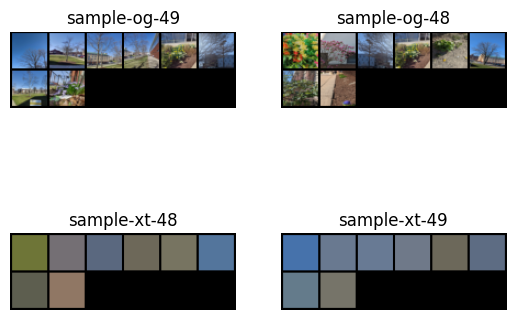

In [56]:
rows = 2
import os
import matplotlib.pyplot as plt
import PIL
%matplotlib inline
results_path="./results1/"
results_images=os.listdir (results_path)
for num, x in enumerate(results_images):
    img = PIL.Image.open(results_path+x)
    plt.subplot(rows,2,num+1)
    plt.title(x.split('.')[0])
    plt.axis('off')
    plt.imshow(img)

In [40]:
#trainer.fid_distance_decrease_from_manifold(test_data, calculate_fid_given_samples, start=0, end=None)

In [42]:
from functools import partial
import torchgeometry as tgm
import torch.nn as nn
class MiniGaussianDiffusion(nn.Module):
    def __init__(
        self,
        denoise_fn,
        *,
        image_size,
        device_of_kernel,
        channels = 3,
        timesteps = 1000,
        loss_type = 'l1',
        kernel_std = 0.1,
        kernel_size = 3,
        blur_routine = 'Incremental',
        train_routine = 'Final',
        sampling_routine='default',
        discrete=False
    ):
        super().__init__()
        self.channels = channels
        self.image_size = image_size
        self.denoise_fn = denoise_fn
        self.device_of_kernel = device_of_kernel

        self.num_timesteps = int(timesteps)
        self.loss_type = loss_type
        self.kernel_std = kernel_std
        self.kernel_size = kernel_size
        self.blur_routine = blur_routine

        to_torch = partial(torch.tensor, dtype=torch.float32)
        self.gaussian_kernels = nn.ModuleList(self.get_kernels())
        self.train_routine = train_routine
        self.sampling_routine = sampling_routine
        self.discrete=discrete



    def blur(self, dims, std):
        return tgm.image.get_gaussian_kernel2d(dims, std)

    def get_conv(self, dims, std, mode='circular'):
        kernel = self.blur(dims, std)
        conv = nn.Conv2d(in_channels=self.channels, out_channels=self.channels, kernel_size=dims, padding=int((dims[0]-1)/2), padding_mode=mode,
                         bias=False, groups=self.channels)
        with torch.no_grad():
            kernel = torch.unsqueeze(kernel, 0)
            kernel = torch.unsqueeze(kernel, 0)
            kernel = kernel.repeat(self.channels, 1, 1, 1)
            conv.weight = nn.Parameter(kernel)

        return conv

    def get_kernels(self):
        kernels = []
        for i in range(self.num_timesteps):
            if self.blur_routine == 'Incremental':
                kernels.append(self.get_conv((self.kernel_size, self.kernel_size), (self.kernel_std*(i+1), self.kernel_std*(i+1)) ) )
            
        return kernels


    @torch.no_grad()
    def sample(self, batch_size = 16, img=None, t=None):
        #print ("In Sample")
        self.denoise_fn.eval()

        if t==None:
            t=self.num_timesteps
        
        for i in range(t):
            with torch.no_grad():
                img = self.gaussian_kernels[i](img)

        orig_mean = torch.mean(img, [2, 3], keepdim=True)
        #print(orig_mean.squeeze()[0])

        temp = img
        if self.discrete:
            img = torch.mean(img, [2, 3], keepdim=True)
            img = img.expand(temp.shape[0], temp.shape[1], temp.shape[2], temp.shape[3])

        # 3(2), 2(1), 1(0)
        xt = img
        direct_recons = None
        while(t):
            step = torch.full((batch_size,), t - 1, dtype=torch.long).cuda() 
            x = self.denoise_fn(img)
            #print ("Output of denoising function : ", x.shape)
            if direct_recons == None:
                direct_recons = x
                
            for i in range(t-1):
                with torch.no_grad():
                    x = self.gaussian_kernels[i](x)
            img = x
            t = t - 1
        self.denoise_fn.train()
        return xt, direct_recons, img
    
    def q_sample(self, x_start, t):
        max_iters = torch.max(t)
        all_blurs = []
        x = x_start
        for i in range(max_iters+1):
            with torch.no_grad():
                x = self.gaussian_kernels[i](x)
                if self.discrete:
                    if i == (self.num_timesteps-1):
                        x = torch.mean(x, [2, 3], keepdim=True)
                        x = x.expand(x_start.shape[0], x_start.shape[1], x_start.shape[2], x_start.shape[3])
                all_blurs.append(x)

        all_blurs = torch.stack(all_blurs)

        choose_blur = []
        # step is batch size as well so for the 49th step take the step(batch_size)
        for step in range(t.shape[0]):
            if step != -1:
                choose_blur.append(all_blurs[t[step], step])
            else:
                choose_blur.append(x_start[step])

        choose_blur = torch.stack(choose_blur)
        if self.discrete:
            choose_blur = (choose_blur + 1) * 0.5
            choose_blur = (choose_blur * 255)
            choose_blur = choose_blur.int().float() / 255
            choose_blur = choose_blur * 2 - 1
        #choose_blur = all_blurs
        return choose_blur
    
    
    @torch.no_grad()
    def all_sample(self, batch_size=8, img=None, t=10, times=10, eval=True):

        #print (" t : ", t, times)
        self.denoise_fn.eval()

        for i in range(t):
             with torch.no_grad():
                    img = self.gaussian_kernels[i](img)

        X_0s = []
        X_ts = []
        temp = img
        if self.discrete:
            img = torch.mean(img, [2, 3], keepdim=True)
            img = img.expand(temp.shape[0], temp.shape[1], temp.shape[2], temp.shape[3])
            noise = torch.randn_like(img) * 0.001
            img = img + noise

        # 3(2), 2(1), 1(0)
        while (times):
            #print ("times : ", times)
            x = self.denoise_fn(img)
            X_0s.append(x)
            X_ts.append(img)
            
            x_times_sub_1 = x
            for i in range(times-1):
                with torch.no_grad():
                    x_times_sub_1 = self.gaussian_kernels[i](x_times_sub_1)

            img = x_times_sub_1
            times = times - 1

        if self.discrete:
            img = img - noise
        X_0s.append(img)

        #self.denoise_fn.train()
        return X_0s, X_ts
    
    
    def p_losses(self, x_start, t):
        b, c, h, w = x_start.shape
        if self.train_routine == 'Final':
            x_blur = self.q_sample(x_start=x_start, t=t)
            x_recon = self.denoise_fn(x_blur)
            if self.loss_type == 'l1':
                loss = (x_start - x_recon).abs().mean()
            elif self.loss_type == 'l2':
                loss = F.mse_loss(x_start, x_recon)
            else:
                raise NotImplementedError()

        return loss
        
        
    def forward(self, x, *args, **kwargs):
        #print ("Input to diffusion shape : ", x.shape)
        b, c, h, w, device, img_size, = *x.shape, x.device, self.image_size
        assert h == img_size and w == img_size, f'height and width of image must be {img_size}'
        t = torch.randint(0, self.num_timesteps, (b,), device=device).long()
        return self.p_losses(x, t, *args, **kwargs)
        


In [43]:
import torch
import torch.nn as nn

class DoubleConv(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(DoubleConv, self).__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True),
            nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True)
        )

    def forward(self, x):
        return self.conv(x)

class Down(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(Down, self).__init__()
        self.down = nn.Sequential(
            nn.MaxPool2d(kernel_size=2),
            DoubleConv(in_channels, out_channels)
        )

    def forward(self, x):
        return self.down(x)

class Up(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(Up, self).__init__()
        self.up = nn.Sequential(
            nn.ConvTranspose2d(in_channels, in_channels , kernel_size=2, stride=2),
            DoubleConv(in_channels, out_channels)
        )

    def forward(self, x1, x2):
        x1 = self.up(x1)
        #print (" up 1 : ", x1.shape, x2.shape)
        x = torch.cat([x2, x1], dim=1)
        return x
    

class DiffusionMiniNet(nn.Module):
    def __init__(self, in_channels=3, out_channels=3, features=[32, 64]):
        super(DiffusionMiniNet, self).__init__()
        self.down1 = Down(in_channels, features[0])
        self.down2 = Down(features[0], features[1])
        self.up1 = Up(features[1], features[0])
        self.up2 = nn.Sequential(
            nn.ConvTranspose2d(features[1], features[1] , kernel_size=2, stride=2),
            nn.Conv2d(features[1], out_channels, kernel_size=1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x1 = self.down1(x)
        x2 = self.down2(x1)
        x = self.up1(x2, x1)
        #print (x1.shape, x2.shape, x.shape)
        x = self.up2(x)
        #print (x.shape)
        return x
    
mininet = DiffusionMiniNet()
#mininet

In [44]:
mininetnel

DiffusionMiniNet(
  (down1): Down(
    (down): Sequential(
      (0): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (1): DoubleConv(
        (conv): Sequential(
          (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU(inplace=True)
          (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (5): ReLU(inplace=True)
        )
      )
    )
  )
  (down2): Down(
    (down): Sequential(
      (0): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (1): DoubleConv(
        (conv): Sequential(
          (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
   

In [45]:
model_output = mininet(img)
model_output.shape

torch.Size([8, 3, 32, 32])

In [46]:
mini_diffusion = MiniGaussianDiffusion(
    mininet,
    image_size = image_size,
    device_of_kernel = 'cuda',
    channels = 3,
    timesteps = 10,  
    loss_type = 'l1',    
    kernel_std=blur_std,
    kernel_size=blur_size,
    blur_routine=blur_routine,
    train_routine = train_routine,
    sampling_routine = sampling_routine,
    discrete=discrete
).cuda()

mini_diffusion

MiniGaussianDiffusion(
  (denoise_fn): DiffusionMiniNet(
    (down1): Down(
      (down): Sequential(
        (0): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
        (1): DoubleConv(
          (conv): Sequential(
            (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): ReLU(inplace=True)
            (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
            (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (5): ReLU(inplace=True)
          )
        )
      )
    )
    (down2): Down(
      (down): Sequential(
        (0): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
        (1): DoubleConv(
          (conv): Sequential(
            (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
            (1): 

In [54]:
save_folder= os.path.join (path , "mini_results")

mini_model_trainer = Trainer(
    mini_diffusion,
    train_data, train_dl,
    #image_path,
    image_size = image_size,
    train_batch_size = batch_size,
    train_lr = 1e-5,
    train_num_steps = train_steps,         # total training steps
    step_start_ema=step_start_ema,
    save_and_sample_every=10,
    gradient_accumulate_every = 2,    # gradient accumulation steps
    ema_decay = 0.0995,                # exponential moving average decay
    fp16 = False,                       # turn on mixed precision training with apex
    results_folder = save_folder,
    load_path = load_path,
    dataset = "custom"
)

In [55]:
mini_model_trainer.train()

0: 0.5596287846565247
0: 0.5975894331932068
Mean of last 10: 0.565823804248463
Mean of last 20: 0.5229867100715637
Mean of last 30: 0.5185805613344366
Mean of last 40: 0.5100143307989294
Mean of last 50: 0.5094154477119446
Mean of last 60: 0.5106594996018843
Mean of last 70: 0.510660086165775
Mean of last 80: 0.5074118348685178
Mean of last 90: 0.503241238268939
100: 0.5251894593238831
100: 0.5462073087692261
Mean of last 100: 0.5048381388187408
Mean of last 110: 0.49141683361747046
Mean of last 120: 0.502188728614287
Mean of last 130: 0.494463403116573
Mean of last 140: 0.4985260936346921
Mean of last 150: 0.4924753348935734
Mean of last 160: 0.49573456292802637
Mean of last 170: 0.49173957922241907
Mean of last 180: 0.48768394643610175
Mean of last 190: 0.491742804646492
200: 0.5512227416038513
200: 0.49185270071029663
Mean of last 200: 0.4805428304455497
Mean of last 210: 0.4816014062274586
Mean of last 220: 0.4886312891136516
Mean of last 230: 0.48433689502152527
Mean of last 240: 

In [65]:
test_imgs = next(test_dl)
print(f"\n test batch data size: {test_imgs.size()}")
mini_model_trainer.test_from_image (test_imgs, "test", )


 test batch data size: torch.Size([8, 3, 32, 32])


/tmp/ipykernel_16388/1674064009.py:371: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  frames_0.append(imageio.imread(str(self.results_folder / f'sample-{i}-{extra_path}-x0.png')))
/tmp/ipykernel_16388/1674064009.py:377: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  frames_t.append(imageio.imread(str(self.results_folder / f'sample-{i}-{extra_path}-xt.png')))


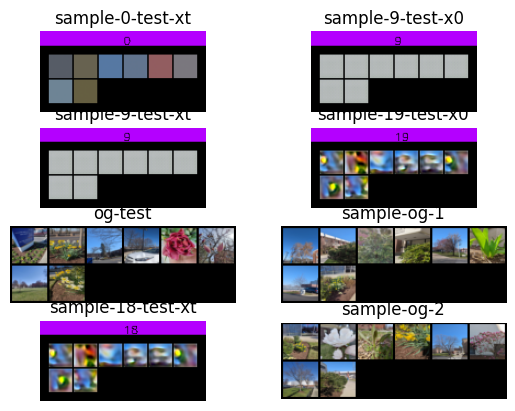

In [66]:
rows = 2
import os
import matplotlib.pyplot as plt
import PIL
%matplotlib inline
results_path="./mini_results1/"
results_images=os.listdir (results_path)
for num, x in enumerate(results_images):
    img = PIL.Image.open(results_path+x)
    plt.subplot(4,2,num+1)
    plt.title(x.split('.')[0])
    plt.axis('off')
    plt.imshow(img)